# Part 1

In [ ]:
# Base class.
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    # Activation of firing rate based on stimulus strength.
    def activate(self, stimulus_strength):
        pass  

# Intermediate class.
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    # Sensing the received stimulus.
    def sense_stimulus(self, stimulus):
        pass  

# Leaf classes.
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    # Light detection behavior.
    def light_detection(self, light_intensity):
        pass  

    def light_response(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    # Pressure detection behavior.
    def pressure_detection(self, pressure_level):
        pass  

# Intermediate class.
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    # Controlling of target muscles based on the activation level.
    def control_muscle(self):
        pass  

# Leaf classes.
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    # Controlling of skeletal muscle.
    def skeletal_muscle_control(self):
        pass  


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    # Controlling of muscle spindle.
    def muscle_spindle_control(self):
        pass  


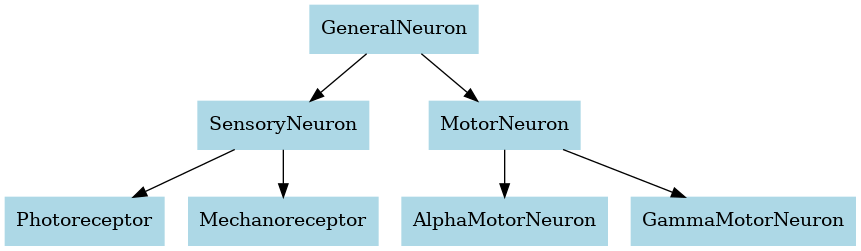

In [ ]:
# Creating a class hierarchy graph.

import pydot
from IPython.display import Image

# Defining the class hierarchy.
class_hierarchy = """
digraph ClassHierarchy {
    node [shape=box, style=filled, color=lightblue];
    GeneralNeuron [label="GeneralNeuron"];
    SensoryNeuron [label="SensoryNeuron"];
    Photoreceptor [label="Photoreceptor"];
    Mechanoreceptor [label="Mechanoreceptor"];
    MotorNeuron [label="MotorNeuron"];
    AlphaMotorNeuron [label="AlphaMotorNeuron"];
    GammaMotorNeuron [label="GammaMotorNeuron"];

    GeneralNeuron -> SensoryNeuron;
    GeneralNeuron -> MotorNeuron;
    SensoryNeuron -> Photoreceptor;
    SensoryNeuron -> Mechanoreceptor;
    MotorNeuron -> AlphaMotorNeuron;
    MotorNeuron -> GammaMotorNeuron;
}
"""

# Converting the class hierarchy to a graph.
graph = pydot.graph_from_dot_data(class_hierarchy)[0]

# Rendering the graph.
image_date = graph.create_png()

# Displaying the image.
Image(image_date)

# Part 2

## Q1

Verification:
1. Length of downsampled_signal is 20 should be around 20% of original length 100 
2. Visualization of the downsampled signal showing it contains all max and min values of the original signal.



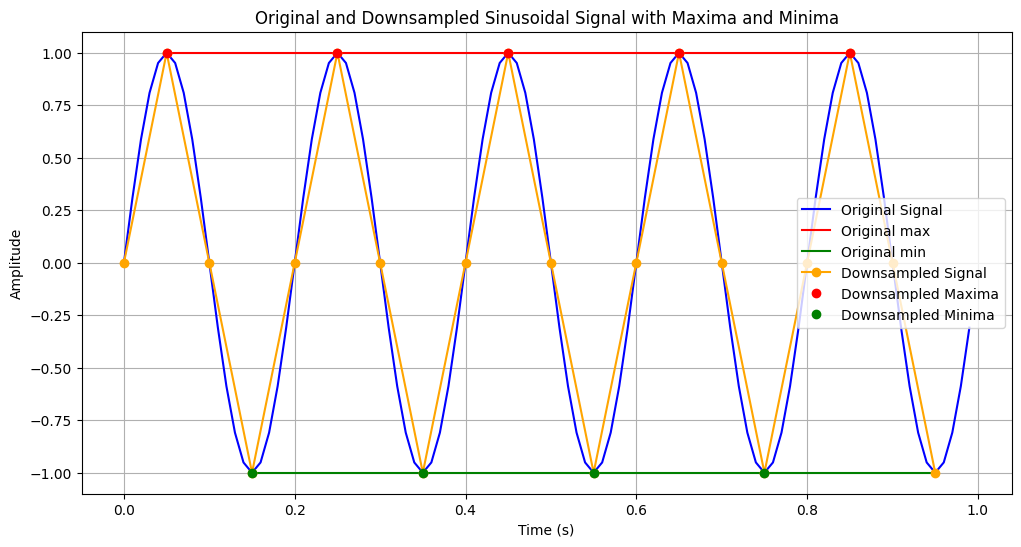

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_max_min(arr):
    max_indices = []
    min_indices = []
    
    # Running a loop over all elements of the array except the edges.
    for i in range(1, len(arr) - 1):
        # Local maxima.
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            max_indices.append(i)
        # Local minima.
        elif arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            min_indices.append(i)
    
    return max_indices, min_indices


def downsample_signal(signal, downsample_factor=5):
    # Calculating the maxima and minima indices.
    max_indices, min_indices = find_max_min(signal)

    # Creating a sorted np array of the maxima and minima indices.
    min_max_indices = np.sort(np.concatenate((max_indices, min_indices)))
    
    # Downsample: Taking every fifth point in addition to the extreme points.
    downsampled_indices = np.arange(0, len(signal), downsample_factor)

    # Combining the downsampled indices with the maxima and minima indices.
    combined_indices = np.unique(np.concatenate((downsampled_indices, min_max_indices)))
    
    return signal[combined_indices], combined_indices

# Creating a time axis from 0 to 1 seconds with a sampling interval of 0.01 seconds.
time = np.arange(0, 1, 0.01)

# Creating a sinusoidal signal with a frequency of 5 Hz.
frequency = 5
original_signal = np.sin(2 * np.pi * frequency * time)

# Downsampling the sinusoidal signal we created.
downsampled_signal, downsampled_indices = downsample_signal(original_signal)

# Verification.
print('Verification:\n1. Length of downsampled_signal is',len(downsampled_signal), 'should be around 20% of original length',len(original_signal), '\n2. Visualization of the downsampled signal showing it contains all max and min values of the original signal.\n')

og_max_indices, og_min_indices = find_max_min(original_signal)
original_max_min_indices = np.concatenate((og_max_indices, og_min_indices))

for i in range(len(original_max_min_indices)):
    if(original_signal[original_max_min_indices[i]] not in downsampled_signal):
       print("error - missing minimum or maximum value")

# Plotting the original and downsampled signals.

# Original signal.
# The red circles represent the maxima and the green circles represent the minima.
plt.figure(figsize=(12, 6))
plt.plot(time, original_signal, label='Original Signal', color='blue')
plt.plot(time[og_max_indices], original_signal[og_max_indices], color='red', label='Original max')
plt.plot(time[og_min_indices], original_signal[og_min_indices], color='green', label='Original min')

# Downsampled signal.
plt.plot(time[downsampled_indices], downsampled_signal, 'o-', label='Downsampled Signal', color='orange')

# Mapping the max and min indices to the downsampled signal.
ds_max_indices, ds_min_indices = find_max_min(downsampled_signal)
plt.plot(time[downsampled_indices][ds_max_indices], downsampled_signal[ds_max_indices], 'ro', label='Downsampled Maxima')
plt.plot(time[downsampled_indices][ds_min_indices], downsampled_signal[ds_min_indices], 'go', label='Downsampled Minima')

# Setting plot labels and title.
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Downsampled Sinusoidal Signal with Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()

## Q2
NOTE: Please run steps one by one to load dependencies.

### Point 1: 
#### Plot the price of all the laptops.

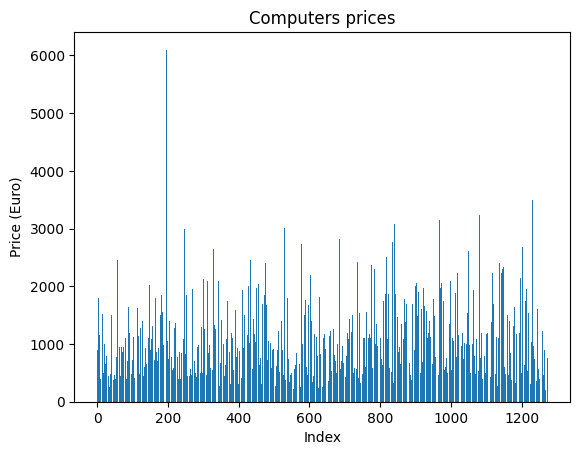

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("laptop_price - dataset.csv")

laptop_ids = np.arange(0, len(df))
laptop_prices = df['Price (Euro)']

# Creating a bar plot of the laptop prices.
plt.bar(laptop_ids, laptop_prices)
plt.title('Computers prices')
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.show()

### Point 2:
#### Which company has on average the most expensive laptop?

In [34]:
# Calculating the average price of laptops.
average_price_per_company = df.groupby('Company')['Price (Euro)'].mean()
print(average_price_per_company)

# Finding the company with the highest average price.
company_with_max_average = average_price_per_company.idxmax()
max_average_price = average_price_per_company.max()
print(f"\nThe company with the highest average price is {company_with_max_average} with an average price of {max_average_price} Euro.")

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

The company with the highest average price is Razer with an average price of 3346.1428571428573 Euro.


### Point 3:
#### Find the different types of operating systems present in the data.

In [4]:
unique_os = df['OpSys'].unique()

print('The operating systems present:\n', unique_os)

The operating systems present:
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


### Point 4:
#### Plot for each operating system the distribution of the prices.

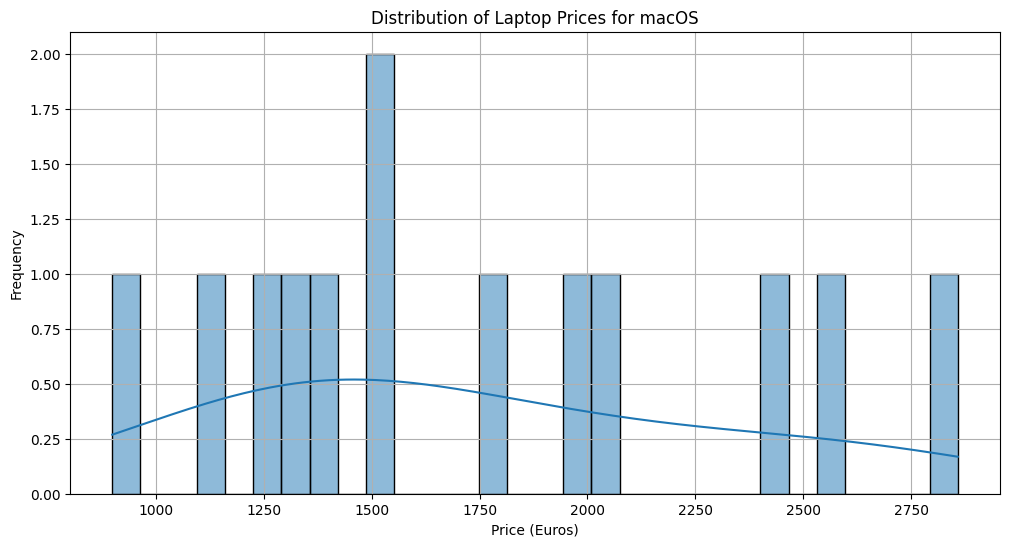

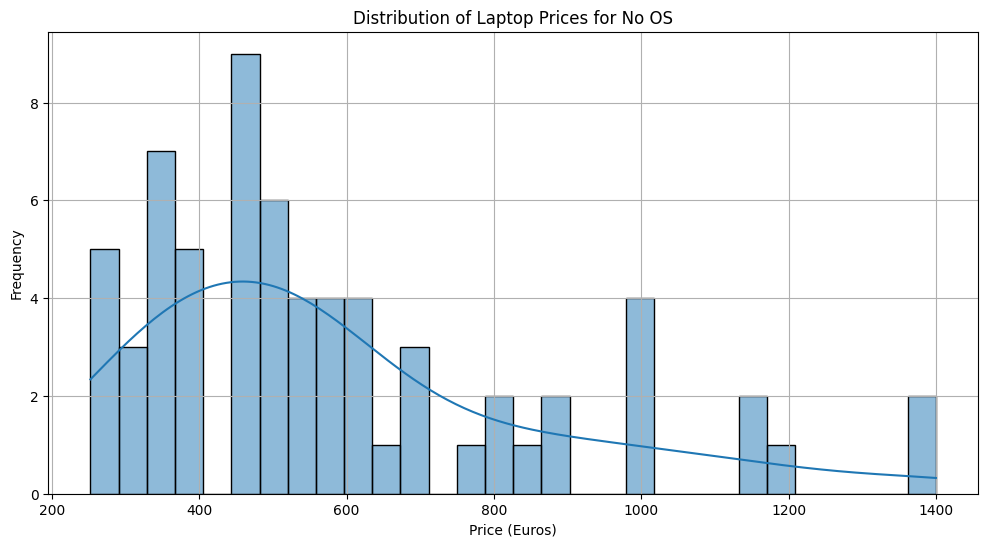

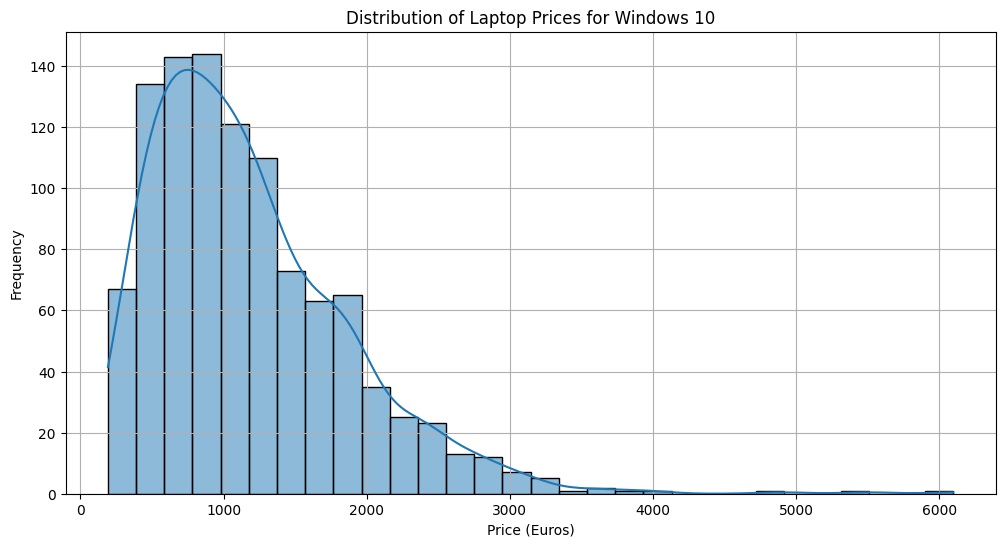

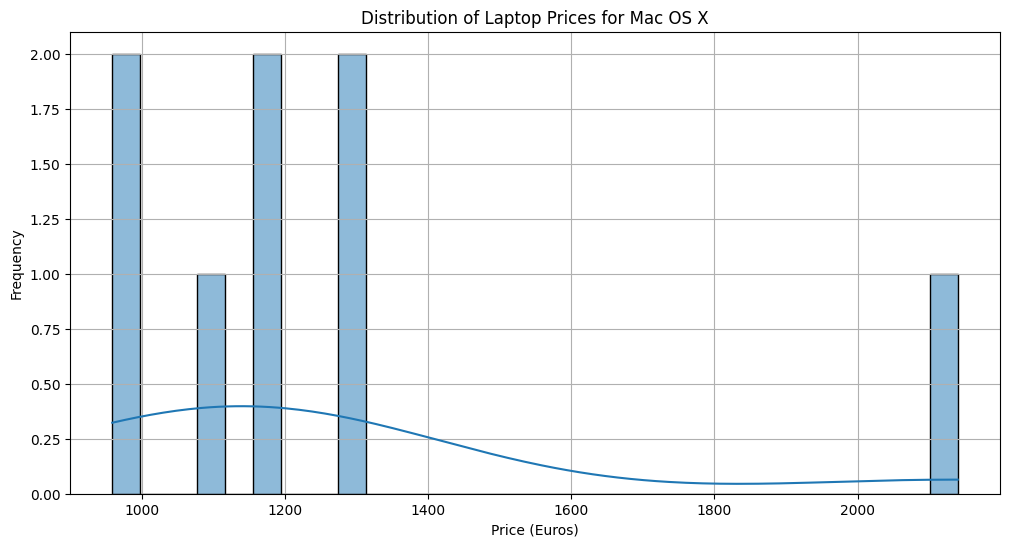

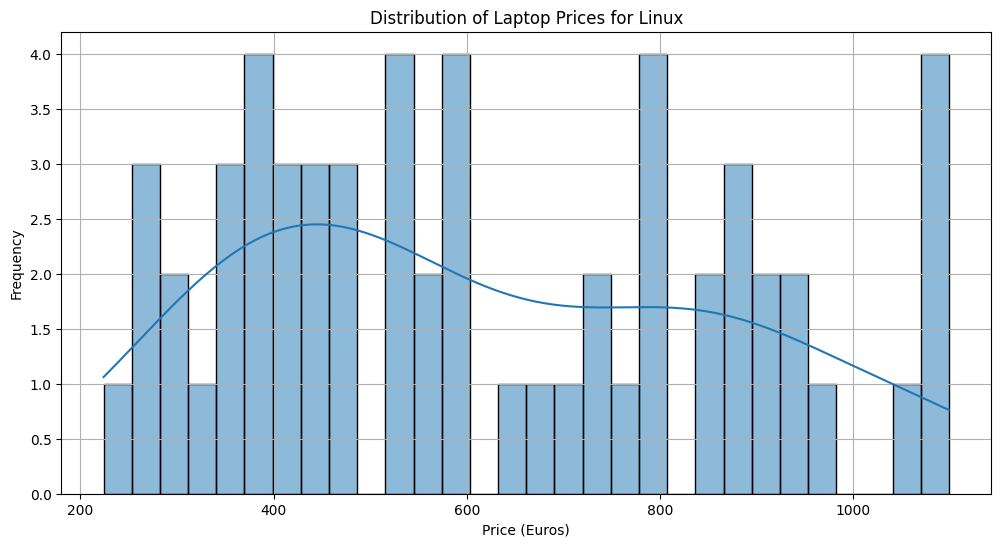

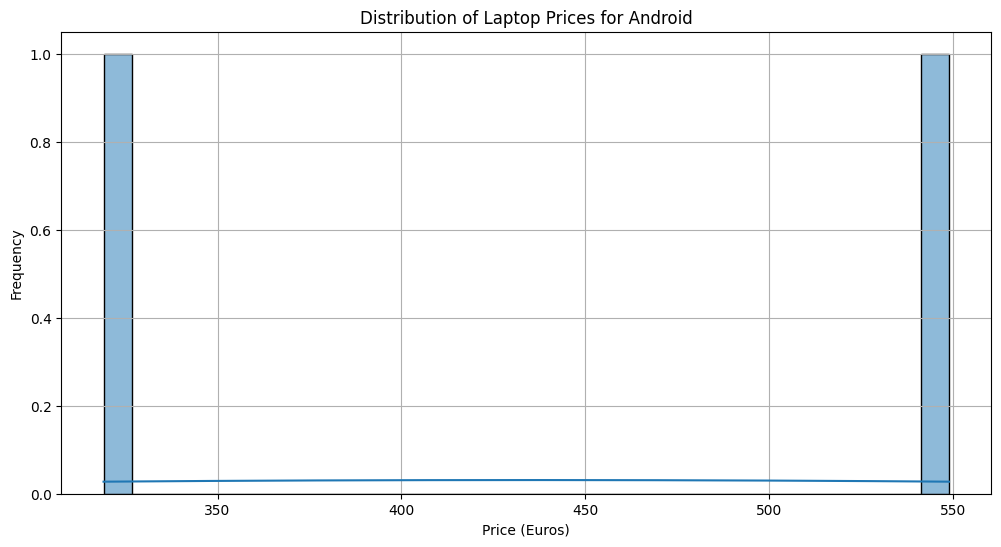

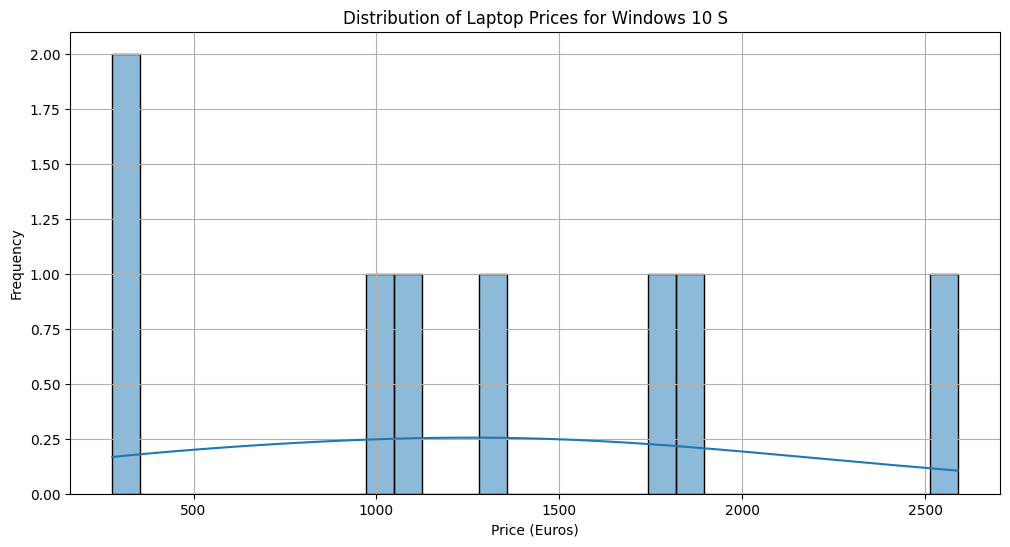

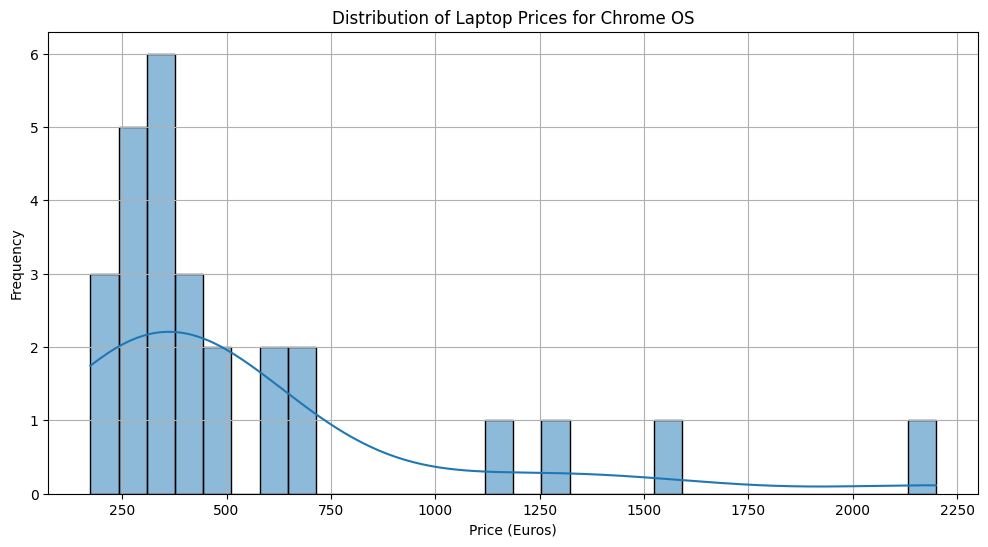

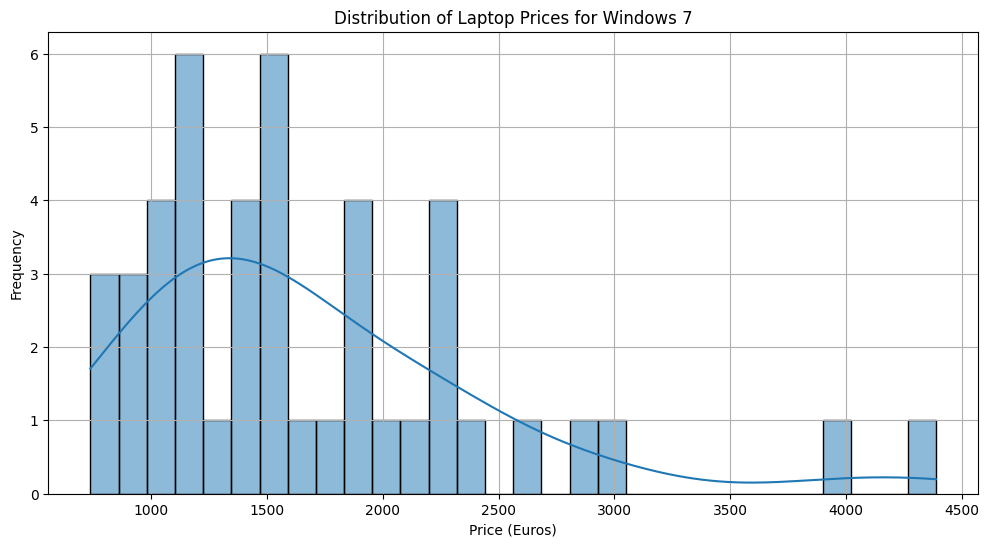

In [5]:
for os in unique_os:
    os_df = df[df['OpSys'] == os]
    plt.figure(figsize=(12, 6))
    sns.histplot(os_df['Price (Euro)'], bins=30, kde=True)
    plt.xlabel('Price (Euros)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Laptop Prices for {os}')
    plt.grid(True)
    plt.show()

### Point 5:
#### Plot the relationship between RAM and price.

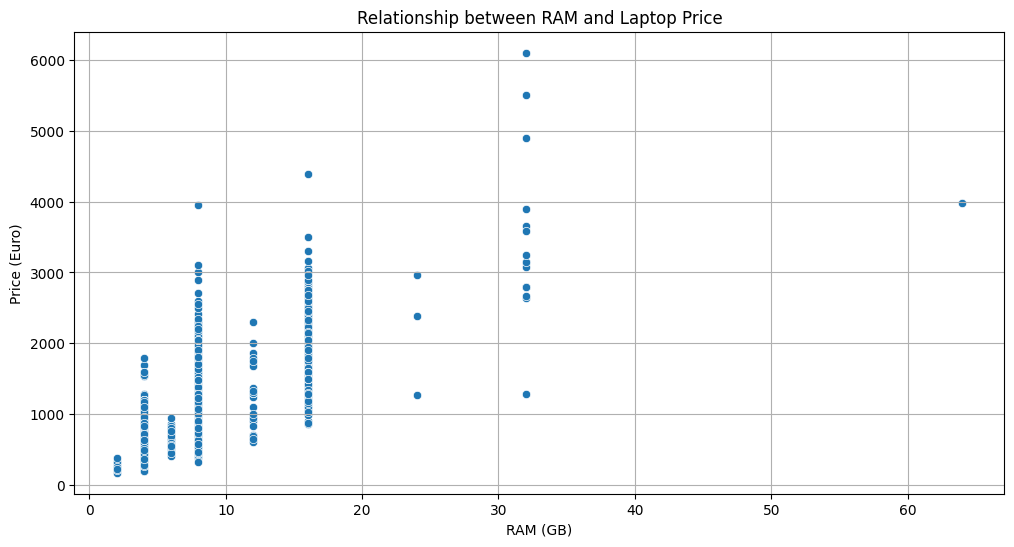

In [ ]:
# Plotting a scatter plot of the relationship between RAM and Price.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')
plt.grid(True)
plt.show()

### Point 6:
#### Create a new column for the dataframe called 'Storage Type'.

In [7]:
import re
print(df['Memory'].unique(), '\n')

memory_info = df['Memory']

# Creating a function for extracting the memory types from memory information of each entry (line).
def extract_storage_type(memory):
    # Use regex to find all words that are not numbers or units
    storage_types = re.findall(r'\b(Flash Storage|\b[^\d\s]+\b)', memory)
    # Join the storage types into a single string
    return ' + '.join(storage_types)

# Applying the function to the memory_info column.
df['Storage Type'] = memory_info.apply(extract_storage_type)

# Verifying the new column.
print(df[['Memory', 'Storage Type']].head(30))

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid'] 

                    Memory   Storage Type
0                128GB SSD            SSD
1      128GB Flash Storage  Flash Storage
2                256GB SSD            SSD
3                512GB SSD            SSD
4                256GB SSD            SSD
5                500GB HDD 

### Bonus question:
Think of additional questions related to this data. What types of 
analyses and visualizations would you use to address them? Select two questions from 
your list and implement. Submit your list of questions, suggested analyses and 
visualization and the implementation.

#### Question 1: 
How does each attribute affect the price of the computer?
#### Analysis: 
I'll calculate the effect each attribute has on the price by converting
categorical attributes to numerical values and feeding the data into a 
machine lerning model (I chose random forest).

                       Attribute  Importance
2                       RAM (GB)    0.552137
3                    Weight (kg)    0.070810
644            TypeName_Notebook    0.066452
1            CPU_Frequency (GHz)    0.048811
0                         Inches    0.023238
..                           ...         ...
225    Product_IdeaPad 310-15ABR    0.000000
501        Product_Thinkpad L560    0.000000
345             Product_PL60 7RD    0.000000
349  Product_Pavilion 15-CK000nv    0.000000
351       Product_Pavilion Power    0.000000

[913 rows x 2 columns]


/tmp/ipykernel_318785/1486085057.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Attribute', data=top_features, palette='viridis')


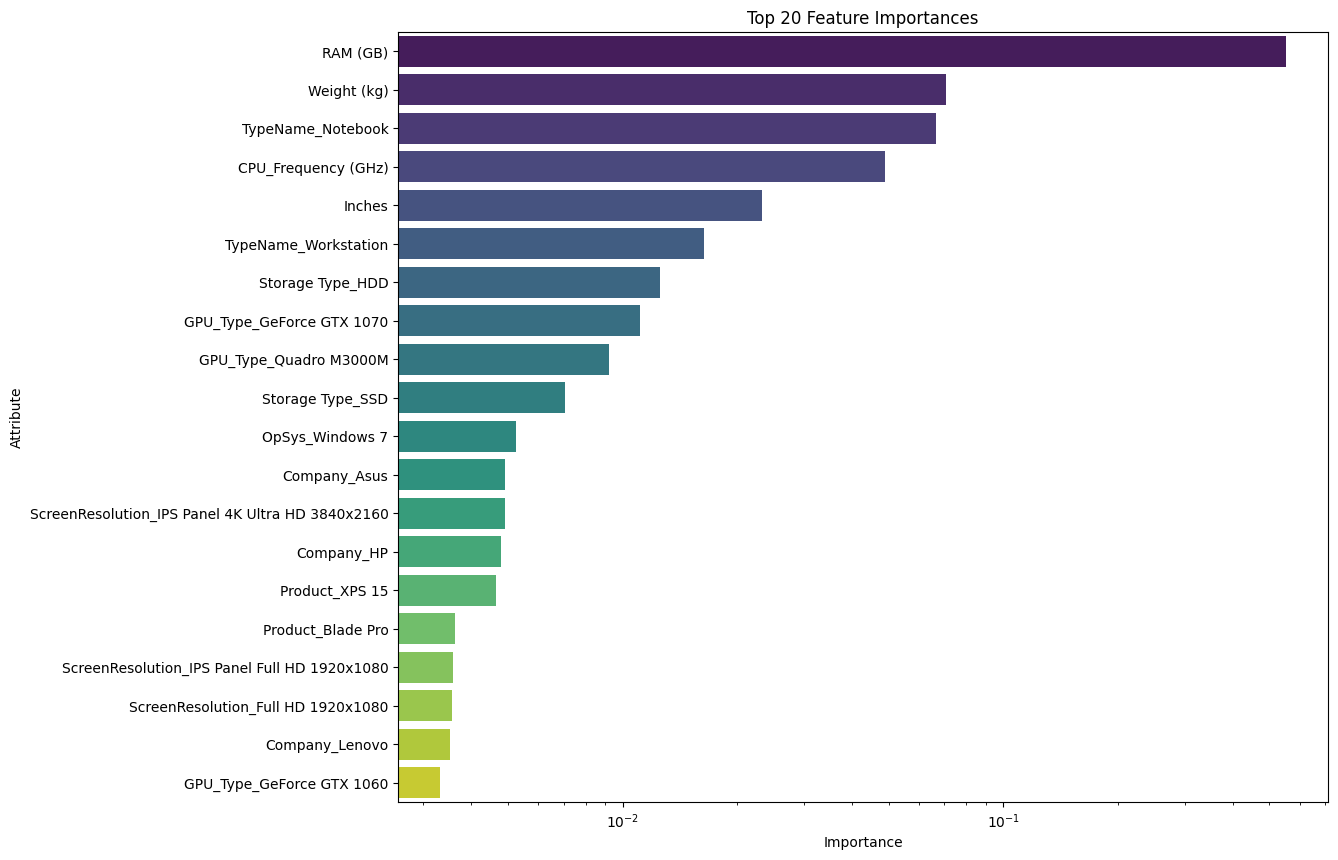

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Converting categorical variables to numerical by converting them to multiple boolean columns (0/1).
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'Storage Type', 'GPU_Company', 'GPU_Type', 'OpSys']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Dropping the Memory column which we didn't use (used Storage Type instead).
df_encoded = df_encoded.drop(['Memory'], axis=1)
# print(df_encoded.head(10))

# Splitting the data into features and target
X = df_encoded.drop('Price (Euro)', axis=1)
y = df_encoded['Price (Euro)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})

# Sorting by importance factor.
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Limiting the number of features displayed.
top_n = 20
top_features = feature_importances.head(top_n)

# Plot the feature importances (logarithmic scale).
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Attribute', data=top_features, palette='viridis')
plt.xscale('log')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Attribute')
plt.show()

#### Question 2:
From the previous analysis we see that RAM is the attribute that affects
the price the most. In that case I want to ask:
What models have the best RAM/price ratio?
#### Analysis:
I'll calculate the value for money ratio RAM/price and plot a bar graph 
of this ratio vs model to see which is the most cost effective model.

/tmp/ipykernel_318785/960586410.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RAM_Price_Ratio', y='Model Combination', data=top_10, palette='viridis')


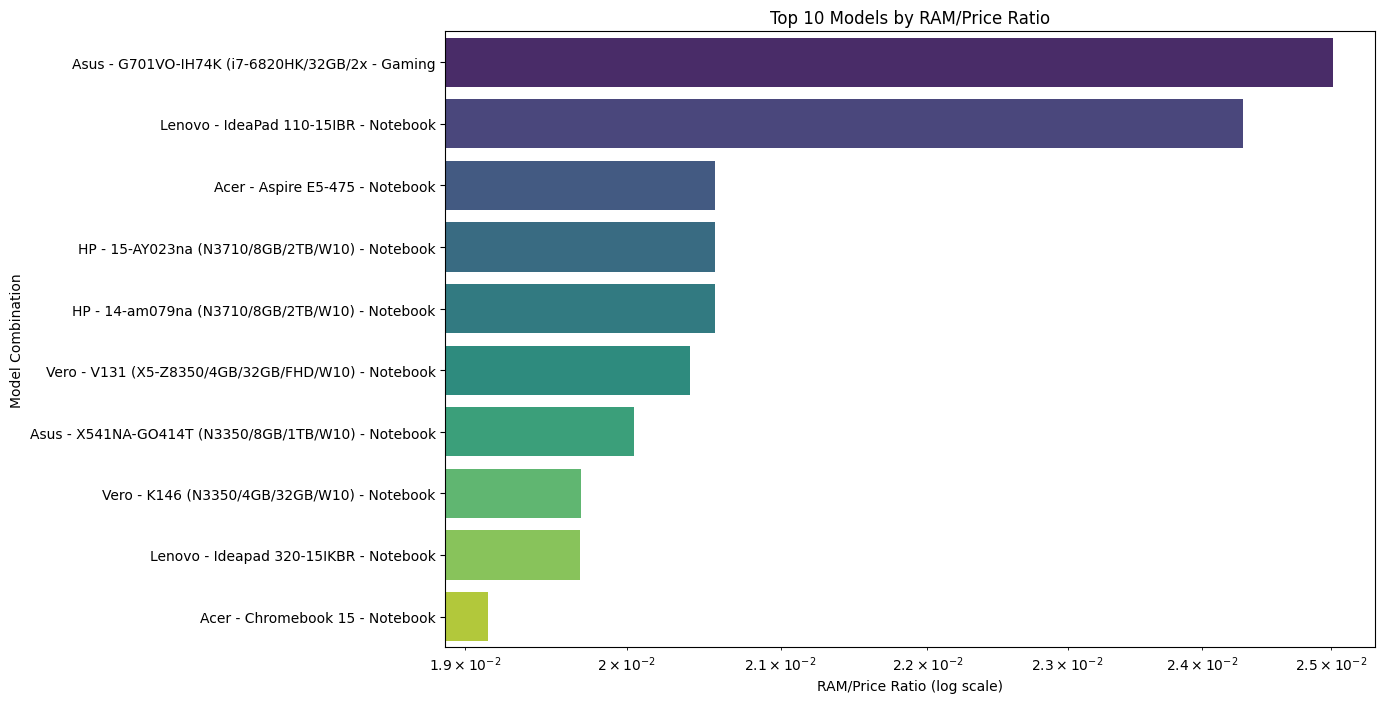

In [24]:
# Create a new column that combines Company, Product, and TypeName
df['Model Combination'] = df['Company'] + ' - ' + df['Product'] + ' - ' + df['TypeName']

# Calculating the RAM/Price ratio
df['RAM_Price_Ratio'] = df['RAM (GB)'] / df['Price (Euro)']

# Selecting the top 10 values with the highest ratio
top_10 = df.nlargest(10, 'RAM_Price_Ratio')

# Plotting the results (logarithmic scale).
plt.figure(figsize=(12, 8))
sns.barplot(x='RAM_Price_Ratio', y='Model Combination', data=top_10, palette='viridis')
plt.xscale('log')
plt.xlabel('RAM/Price Ratio (log scale)')
plt.ylabel('Model Combination')
plt.title('Top 10 Models by RAM/Price Ratio')
plt.show()